# SCORING: Tutorial

### libraries

In [1]:
import torch
import clip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from transformers import AutoProcessor, BlipModel
from diffusers import StableDiffusionPipeline
from diffusers.utils import make_image_grid

### Scoring Functions

The CLIP scoring code is taken from: [CLIP score](https://unimatrixz.com/blog/latent-space-clip-score/)

In [2]:
def get_clip_score(image_path, text):
# Load the pre-trained CLIP model and the image
    model, preprocess = clip.load('ViT-B/32')
    image = Image.open(image_path)

    # Preprocess the image and tokenize the text
    image_input = preprocess(image).unsqueeze(0)
    text_input = clip.tokenize([text])
    
    # Move the inputs to GPU if available
    device = "cuda" if torch.cuda.is_available() else "cpu"
    image_input = image_input.to(device)
    text_input = text_input.to(device)
    model = model.to(device)
    
    # Generate embeddings for the image and text
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_input)
    
    # Normalize the features
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    
    # Calculate the cosine similarity to get the CLIP score
    clip_score = torch.matmul(image_features, text_features.T).item()
    
    return clip_score

### BLIP scoring

The BLIP scoring code is taken from: [BLIP HF](https://huggingface.co/docs/transformers/en/model_doc/blip)

In [5]:
def get_blip_score(image_path, prompt):
# Load the pre-trained CLIP model and the image
    model = BlipModel.from_pretrained("Salesforce/blip-image-captioning-base")
    processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

    # Preprocess the image and tokenize the text
    image = Image.open(image_path)
    inputs = processor(
        text=prompt, images=image, return_tensors="pt", padding=True
        )
    
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    
    return logits_per_image

## CLIP scoring

In [6]:
image_path = "/home/safouane/Downloads/SRT2I/optimal_pairs4/1_elephant.png"
prompt = "Wide photo of two playful elephants, one spraying water using trunk, another playing with a ball, Morning, grasslands, herd of elephants visible in background, sharp, photography, Canon EOS R5, 24-70mm, f/4, natural lighting"

In [5]:
score = get_clip_score(image_path, prompt)
score

0.31494140625

In [6]:
get_blip_score(image_path, prompt)

/home/arnaud/miniconda3/envs/srt2i/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 't

tensor([[-0.5145]], grad_fn=<TBackward0>)

### 

### SD 2.1 base

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")
pipe.to("cuda")

generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]

images = pipe(prompt, generator=generator, num_images_per_prompt=4).images
# image.save("val_sd.jpg")
# image
make_image_grid(images, rows=2, cols=2)


In [ ]:
for i, im in enumerate(images):
    im.save(f"./scoring/base{i}.jpg")

In [ ]:
generator

### SD 2.1 + LoRA

In [ ]:
model_path = "./fine_tune_sd/soptimpair4_lora_100_base_2"
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")
pipe.load_lora_weights(model_path)
pipe.to("cuda")

generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]

images = pipe(prompt, generator=generator, cross_attention_kwargs={"scale":0.5}, num_images_per_prompt=4).images
# image.save("val.jpg")
# image

# for i, im in enumerate(images):
#     im.save(f"./scoring/lora_05_{i}.jpg")
make_image_grid(images, rows=2, cols=2)


In [ ]:
model_path = "./fine_tune_sd/soptimpair4_lora_100_base_2"
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")
pipe.load_lora_weights(model_path)
pipe.to("cuda")

generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]

images = pipe(prompt, generator=generator, cross_attention_kwargs={"scale":0.2}, num_images_per_prompt=4).images
# image.save("val.jpg")
# image

# for i, im in enumerate(images):
#     im.save(f"./scoring/lora_02_{i}.jpg")
make_image_grid(images, rows=2, cols=2)


In [ ]:
model_path = "./fine_tune_sd/soptimpair4_lora_100_base_2"
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")
pipe.load_lora_weights(model_path)
pipe.to("cuda")

generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]

images = pipe(prompt, generator=generator, cross_attention_kwargs={"scale":0.7}, num_images_per_prompt=4).images
# image.save("val.jpg")
# image

# for i, im in enumerate(images):
#     im.save(f"./scoring/lora_07_{i}.jpg")
make_image_grid(images, rows=2, cols=2)


In [ ]:
score_clip = get_clip_score("val.jpg", prompt)
score_blip = get_blip_score("val.jpg", prompt)
score_clip, score_blip

In [ ]:
score_clip = get_clip_score("val_sd.jpg", prompt)
score_blip = get_blip_score("val_sd.jpg", prompt)
score_clip, score_blip

In [ ]:
score_clip = get_clip_score("val_willow.jpeg", prompt)
score_blip = get_blip_score("val_willow.jpeg", prompt)
score_clip, score_blip

In [ ]:
score_clip = get_clip_score("val_mj.jpeg", prompt)
score_blip = get_blip_score("val_mj.jpeg", prompt)
score_clip, score_blip

Finals

In [9]:
prompt1 = "A giraffe standing next to a clear, still lake, bending its neck to drink water. Background: tall grasses, reflections of clouds in the water, and distant hills."
prompt2 = "Two elephants standing at the edge of a volcanic crater, with smoke rising from the ground. Background: volcanic landscape, ash and lava flows, and a sense of danger and power."
prompt3 = "Two elephants standing at the edge of a cliff, looking out over a vast ocean. Background: rocky cliffs, crashing waves, and a sense of awe and wonder."

In [10]:
score_clip = get_clip_score("scoring/willow/girafe.jpeg", prompt1)
score_blip = get_blip_score("scoring/willow/girafe.jpeg", prompt1)
score_clip, score_blip

/home/arnaud/miniconda3/envs/srt2i/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 't

(0.34521484375, tensor([[-0.5788]], grad_fn=<TBackward0>))

In [11]:
score_clip = get_clip_score("scoring/willow/volcano.jpeg", prompt2)
score_blip = get_blip_score("scoring/willow/volcano.jpeg", prompt2)
score_clip, score_blip

Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 'text_model.encoder.layer.0.attention.self.key.bias', 'text_model.encoder.layer.0.attention.self.key.weight', 'text_model.encoder.layer.0.attention.self.query.bias', 'text_model.encoder.layer.0.attention.self.query.weight', 'text_model.encoder.layer.0.attention.self.value.bias', 'text_model.encoder.layer.0.attention.self.value.weight', 'text_model.encoder.layer.0.crossattention.output.LayerNorm.bias', 'text_model.

(0.378662109375, tensor([[-0.0783]], grad_fn=<TBackward0>))

In [12]:
score_clip = get_clip_score("scoring/willow/clif.jpeg", prompt3)
score_blip = get_blip_score("scoring/willow/clif.jpeg", prompt3)
score_clip, score_blip

Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 'text_model.encoder.layer.0.attention.self.key.bias', 'text_model.encoder.layer.0.attention.self.key.weight', 'text_model.encoder.layer.0.attention.self.query.bias', 'text_model.encoder.layer.0.attention.self.query.weight', 'text_model.encoder.layer.0.attention.self.value.bias', 'text_model.encoder.layer.0.attention.self.value.weight', 'text_model.encoder.layer.0.crossattention.output.LayerNorm.bias', 'text_model.

(0.2724609375, tensor([[0.7355]], grad_fn=<TBackward0>))

### Loop final

In [14]:
prompt1 = "Wide photo of two playful elephants, one spraying water using trunk, another playing with a ball, Morning, grasslands, herd of elephants visible in background, sharp, photography, Canon EOS R5, 24-70mm, f/4, natural lighting"
prompt2 = "A giraffe standing next to a clear, still lake, bending its neck to drink water. Background: tall grasses, reflections of clouds in the water, and distant hills."
prompt3 = "Two elephants standing at the edge of a volcanic crater, with smoke rising from the ground. Background: volcanic landscape, ash and lava flows, and a sense of danger and power."
prompt4 = "Two elephants standing at the edge of a cliff, looking out over a vast ocean. Background: rocky cliffs, crashing waves, and a sense of awe and wonder."

# prompts = [prompt1, prompt1, prompt3, prompt4]

f = open("/home/arnaud/projects/srt2i/valid_prompts.txt", "r")
prompts = [l[:-2] for l in  f.readlines()]
df = pd.DataFrame(index=["wins02b", "tie02b", "lose02b", "wins04b", "tie04b", "lose04b", "wins07b", "tie07b", "lose07b", "wins02k", "tie02k", "lose02k", "wins04k", "tie04k", "lose04k", "wins07k", "tie07k","lose07k"])

In [13]:
lora_path = "./fine_tune_sd/soptimpair4_lora_100_base_2"
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")
pipe.load_lora_weights(lora_path)
pipe.to("cuda")

pipe2 = StableDiffusionPipeline.from_pretrained("IDKiro/sdxs-512-0.9")
pipe2.to("cuda")

generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]

tie_lim = 0.005

for j, prompt in enumerate(prompts[:1]):

    wins02b, lose02b, tie02b = 0, 0, 0
    wins02k, lose02k, tie02k = 0, 0, 0
    wins04b, lose04b, tie04b = 0, 0, 0
    wins04k, lose04k, tie04k = 0, 0, 0
    wins07b, lose07b, tie07b = 0, 0, 0
    wins07k, lose07k, tie07k = 0, 0, 0

    score_clip02s, score_clip04s, score_clip07s, score_clipbs, score_clipks = [], [], [], [], []
    images02 = pipe(prompt, generator=generator, cross_attention_kwargs={"scale":0.2}, num_images_per_prompt=4).images
    images04 = pipe(prompt, generator=generator, cross_attention_kwargs={"scale":0.4}, num_images_per_prompt=4).images
    images07 = pipe(prompt, generator=generator, cross_attention_kwargs={"scale":0.7}, num_images_per_prompt=4).images

    for i, im in enumerate(images02): 
        im.save(path02:=f"./scoring/lora_02_p{j}_{i}.jpg")
        score_clip02s.append(get_clip_score(path02, prompt))
    for i, im in enumerate(images04): 
        im.save(path04:=f"./scoring/lora_04_p{j}_{i}.jpg")
        score_clip04s.append(get_clip_score(path04, prompt))
    for i, im in enumerate(images07): 
        im.save(path07:=f"./scoring/lora_07_p{j}_{i}.jpg")
        score_clip07s.append(get_clip_score(path07, prompt))

    images_base = pipe(prompt, generator=generator, num_images_per_prompt=4).images
    images_kiro = pipe(prompt, generator=generator, num_images_per_prompt=4).images
    
    for i, im in enumerate(images_base): 
        im.save(pathb:=f"./scoring/base_p{j}_{i}.jpg")
        score_clipbs.append(get_clip_score(pathb, prompt))
    for i, im in enumerate(images_kiro): 
        im.save(pathk:=f"./scoring/kiro_p{j}_{i}.jpg")
        score_clipks.append(get_clip_score(pathk, prompt))

    for i, score_clip02 in enumerate(score_clip02s):
        if score_clip02s[i] > score_clipbs[i] + tie_lim:
            wins02b += 1 
        elif score_clip02s[i] < score_clipbs[i] - tie_lim: 
            lose02b += 1
        else: tie02b +=1
        
        if score_clip02s[i] > score_clipks[i] + tie_lim:
            wins02k += 1 
        elif score_clip02s[i] < score_clipks[i] - tie_lim: 
            lose02k += 1
        else: tie02k +=1

    for i, score_clip04 in enumerate(score_clip04s):
        if score_clip04s[i] > score_clipbs[i] + tie_lim:
            wins04b += 1 
        elif score_clip04s[i] < score_clipbs[i] - tie_lim: 
            lose04b += 1
        else: tie04b +=1

        if score_clip04s[i] > score_clipks[i] + tie_lim:
            wins04k += 1 
        elif score_clip04s[i] < score_clipks[i]- tie_lim: 
            lose04k += 1
        else: tie04k +=1

    for i, score_clip07 in enumerate(score_clip07s):
        if score_clip07s[i] > score_clipbs[i] + tie_lim:
            wins07b += 1 
        elif score_clip07s[i] < score_clipbs[i]- tie_lim: 
            lose07b += 1
        else: tie07b +=1

        if score_clip07s[i] > score_clipks[i] + tie_lim:
            wins07k += 1 
        elif score_clip07s[i] < score_clipks[i]- tie_lim: 
            lose07k += 1
        else: tie07k +=1

    print(f"PROMPT {j}")
    print(f"WINS02b {wins02b}, TIE02b {tie02b}, LOSE 02b {lose02b}")
    print(f"WINS04b {wins04b}, TIE04b {tie04b}, LOSE 04b {lose04b}")
    print(f"WINS07b {wins07b}, TIE07b {tie07b}, LOSE 07b {lose07b}")
    print(f"WINS02k {wins02k}, TIE02k {tie02k}, LOSE 02k {lose02k}")
    print(f"WINS04k {wins04k}, TIE04k {tie04k}, LOSE 04k {lose04k}")
    print(f"WINS07k {wins07k}, TIE07k {tie07k}, LOSE 07k {lose07k}")
    scores = [wins02b, tie02b, lose02b, wins04b, tie04b, lose04b, wins07b, tie07b, lose07b, wins02k, tie02k, lose02k, wins04k, tie04k, lose04k, wins07k, tie07k, lose07k]
    df[f'prompt{j}'] = scores 

df.to_csv('scoring_out.csv')

# make_image_grid(images, rows=2, cols=2)



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'block_out_channels': [64, 64, 64, 64], 'sample_size': 512} were passed to AutoencoderTiny, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

PROMPT 0
WINS02b 2, TIE02b 1, LOSE 02b 1
WINS04b 3, TIE04b 0, LOSE 04b 1
WINS07b 2, TIE07b 0, LOSE 07b 2
WINS02k 3, TIE02k 0, LOSE 02k 1
WINS04k 2, TIE04k 0, LOSE 04k 2
WINS07k 1, TIE07k 1, LOSE 07k 2


In [ ]:
PROMPT git
WINS02b 8, LOSE 02b 1
WINS04b 6, LOSE 04b 3
WINS07b 8, LOSE 07b 1
WINS02k 6, LOSE 02k 3
WINS04k 5, LOSE 04k 4
WINS07k 7, LOSE 07k 2

In [15]:
score_clip02s

[0.2646484375,
 0.3349609375,
 0.35009765625,
 0.34912109375,
 0.356201171875,
 0.3837890625,
 0.31640625,
 0.3349609375,
 0.372802734375]

Using only prompt 0 

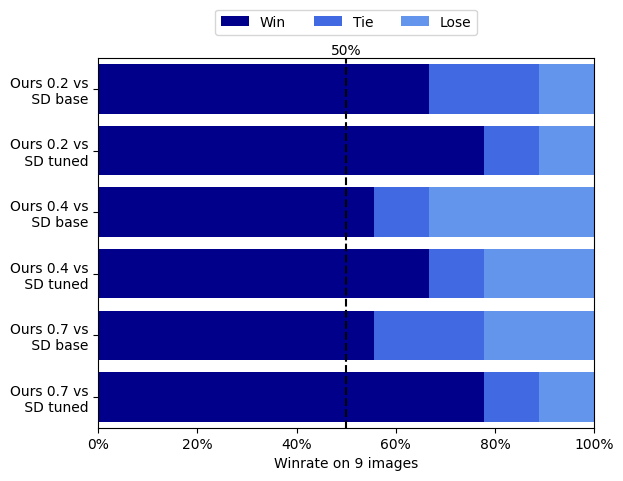

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# data translation
WINS02b, TIE02b, LOSE02b = 7, 1, 1
WINS02k, TIE02k, LOSE02k = 5, 2, 2
WINS04b, TIE04b, LOSE04b = 6, 1, 2
WINS04k, TIE04k, LOSE04k = 5, 1, 3
WINS07b, TIE07b, LOSE07b = 7, 1, 1
WINS07k, TIE07k, LOSE07k = 6, 2, 1

wins = [WINS02b, WINS02k, WINS04b, WINS04k, WINS07b, WINS07k]
ties = [TIE02b, TIE02k, TIE04b, TIE04k, TIE07b, TIE07k]
loses = [LOSE02b, LOSE02k, LOSE04b, LOSE04k, LOSE07b, LOSE07k]

# percentages
total_matches = 9
percent_wins9 = [w / total_matches * 100 for w in wins]
percent_ties9 = [t / total_matches * 100 for t in ties]
percent_loses9 = [l / total_matches * 100 for l in loses]

versuses = ['Ours 0.2 vs\n SD base', 'Ours 0.2 vs\n SD tuned', 'Ours 0.4 vs\n SD base', 'Ours 0.4 vs\n SD tuned', 'Ours 0.7 vs\n SD base', 'Ours 0.7 vs\n SD tuned']
versuses = versuses[::-1]

num_elements = len(wins)
bar_width = 0.3
x = np.arange(num_elements)

# horizontal bar plots
plt.barh(x, percent_wins9, label = "Win", color='darkblue')
plt.barh(x, percent_ties9, label = "Tie", color='royalblue', left=percent_wins9)
plt.barh(x, percent_loses9, label = "Lose", color='cornflowerblue', left=np.add(percent_wins9, percent_ties9))


# plt.title('Match Outcomes')
plt.xlabel('Winrate on 9 images')

plt.ylim(-0.5, num_elements - 0.5)
plt.yticks(x, versuses)

plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 6), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.axvline(x=50, color='black', linestyle='--')
plt.text(50, num_elements - 0.5, '50%', ha='center', va='bottom')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()

prompt 0 + prompt 1

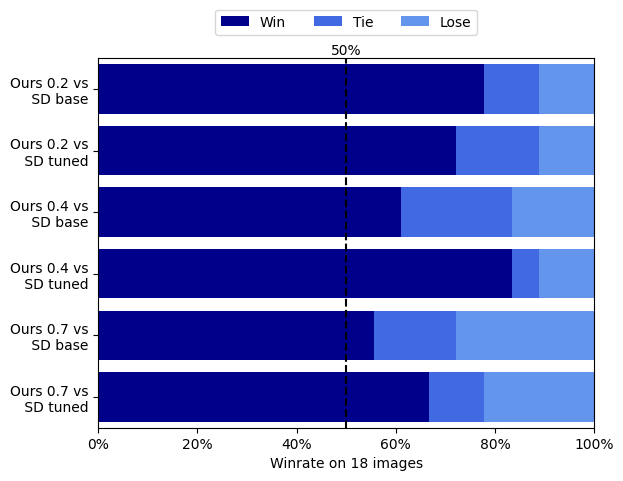

In [60]:
# WINS02b 5, LOSE 02b 4
# WINS04b 5, LOSE 04b 4
# WINS07b 8, LOSE 07b 1
# WINS02k 6, LOSE 02k 3
# WINS04k 6, LOSE 04k 3
# WINS07k 8, LOSE 07k 1

# data
WINS02b, TIE02b, LOSE02b = 12, 2, 4
WINS02k, TIE02k, LOSE02k = 10, 3, 5
WINS04b, TIE04b, LOSE04b = 15, 1, 3
WINS04k, TIE04k, LOSE04k = 11, 4, 3
WINS07b, TIE07b, LOSE07b = 13, 3, 2
WINS07k, TIE07k, LOSE07k = 14, 2, 2

wins = [WINS02b, WINS02k, WINS04b, WINS04k, WINS07b, WINS07k]
ties = [TIE02b, TIE02k, TIE04b, TIE04k, TIE07b, TIE07k]
loses = [LOSE02b, LOSE02k, LOSE04b, LOSE04k, LOSE07b, LOSE07k]

# percentages
total_matches = 18
percent_wins18 = [w / total_matches * 100 for w in wins]
percent_ties18 = [t / total_matches * 100 for t in ties]
percent_loses18 = [l / total_matches * 100 for l in loses]

versuses = ['Ours 0.2 vs\n SD base', 'Ours 0.2 vs\n SD tuned', 'Ours 0.4 vs\n SD base', 'Ours 0.4 vs\n SD tuned', 'Ours 0.7 vs\n SD base', 'Ours 0.7 vs\n SD tuned']
versuses = versuses[::-1]

num_elements = len(wins)
bar_width = 0.3
x = np.arange(num_elements)

# horizontal bar plots
plt.barh(x, percent_wins18, label = "Win", color='darkblue')
plt.barh(x, percent_ties18, label = "Tie", color='royalblue', left=percent_wins18)
plt.barh(x, percent_loses18, label = "Lose", color='cornflowerblue', left=np.add(percent_wins18, percent_ties18))


# plt.title('Match Outcomes')
plt.xlabel('Winrate on 18 images')

plt.ylim(-0.5, num_elements - 0.5)
plt.yticks(x, versuses)

plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 6), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.axvline(x=50, color='black', linestyle='--')
plt.text(50, num_elements - 0.5, '50%', ha='center', va='bottom')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()

prompt 0 + prompt 1 + prompt 2

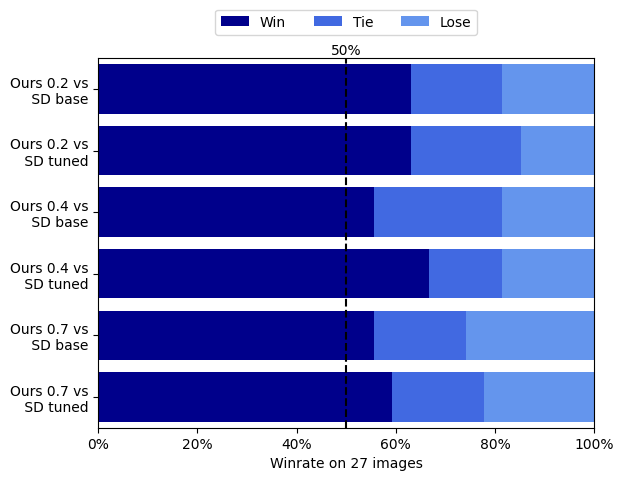

In [61]:
# PROMPT 2
# WINS02b 4, LOSE 02b 5
# WINS04b 5, LOSE 04b 4
# WINS07b 3, LOSE 07b 6
# WINS02k 4, LOSE 02k 5
# WINS04k 4, LOSE 04k 5
# WINS07k 3, LOSE 07k 6

# data
WINS02b, TIE02b, LOSE02b = 16, 5, 6
WINS02k, TIE02k, LOSE02k = 15, 5, 7
WINS04b, TIE04b, LOSE04b = 18, 4, 6
WINS04k, TIE04k, LOSE04k = 15, 7, 5
WINS07b, TIE07b, LOSE07b = 17, 6, 4
WINS07k, TIE07k, LOSE07k = 17, 5, 5

wins = [WINS02b, WINS02k, WINS04b, WINS04k, WINS07b, WINS07k]
ties = [TIE02b, TIE02k, TIE04b, TIE04k, TIE07b, TIE07k]
loses = [LOSE02b, LOSE02k, LOSE04b, LOSE04k, LOSE07b, LOSE07k]

# percentages
total_matches = 27
percent_wins27 = [w / total_matches * 100 for w in wins]
percent_ties27 = [t / total_matches * 100 for t in ties]
percent_loses27 = [l / total_matches * 100 for l in loses]

versuses = ['Ours 0.2 vs\n SD base', 'Ours 0.2 vs\n SD tuned', 'Ours 0.4 vs\n SD base', 'Ours 0.4 vs\n SD tuned', 'Ours 0.7 vs\n SD base', 'Ours 0.7 vs\n SD tuned']
versuses = versuses[::-1]

num_elements = len(wins)
bar_width = 0.3
x = np.arange(num_elements)

# horizontal bar plots
plt.barh(x, percent_wins27, label = "Win", color='darkblue')
plt.barh(x, percent_ties27, label = "Tie", color='royalblue', left=percent_wins27)
plt.barh(x, percent_loses27, label = "Lose", color='cornflowerblue', left=np.add(percent_wins27, percent_ties27))


# plt.title('Match Outcomes')
plt.xlabel('Winrate on 27 images')

plt.ylim(-0.5, num_elements - 0.5)
plt.yticks(x, versuses)

plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 6), ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.axvline(x=50, color='black', linestyle='--')
plt.text(50, num_elements - 0.5, '50%', ha='center', va='bottom')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


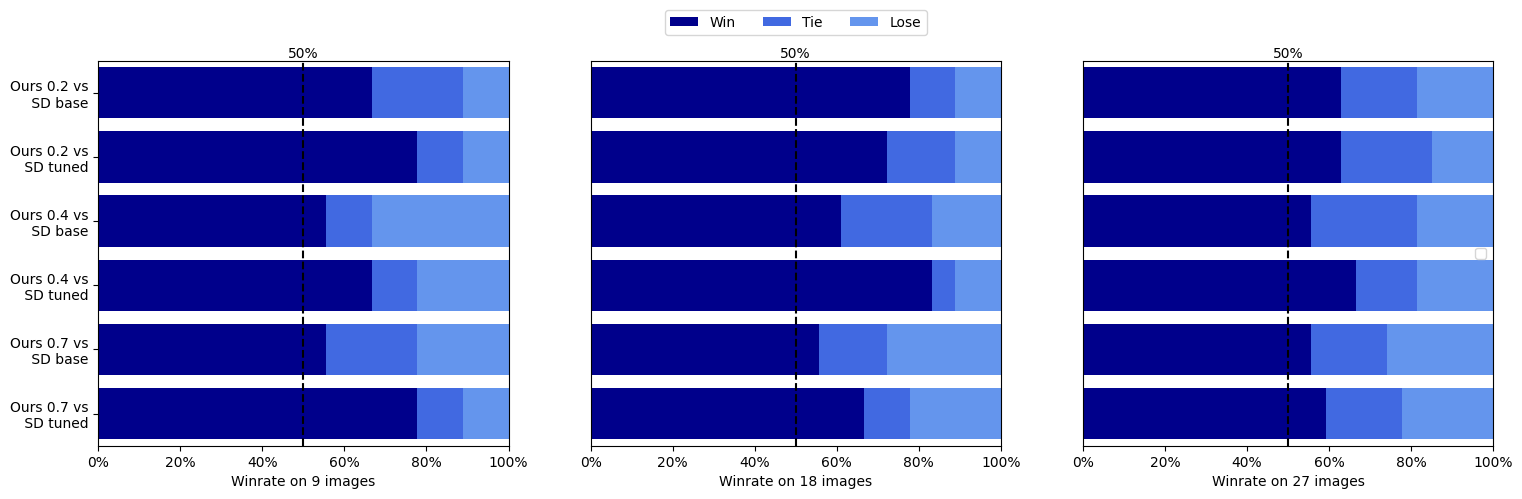

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axs[0].barh(x, percent_wins9, label = "Win", color='darkblue')
axs[0].barh(x, percent_ties9, label = "Tie", color='royalblue', left=percent_wins9)
axs[0].barh(x, percent_loses9, label = "Lose", color='cornflowerblue', left=np.add(percent_wins9, percent_ties9))
axs[0].set_xlabel('Winrate on 9 images')
axs[0].set_ylim(-0.5, num_elements - 0.5)
axs[0].set_yticks(x)
axs[0].set_yticklabels(versuses)
axs[0].set_xlim(0, 100)
axs[0].set_xticks(np.linspace(0, 100, 6))
axs[0].set_xticklabels( ['0%', '20%', '40%', '60%', '80%', '100%'])
axs[0].axvline(x=50, color='black', linestyle='--')
axs[0].text(50, num_elements - 0.5, '50%', ha='center', va='bottom')
# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

axs[1].barh(x, percent_wins18, label = "Win", color='darkblue')
axs[1].barh(x, percent_ties18, label = "Tie", color='royalblue', left=percent_wins18)
axs[1].barh(x, percent_loses18, label = "Lose", color='cornflowerblue', left=np.add(percent_wins18, percent_ties18))
axs[1].set_xlabel('Winrate on 18 images')
axs[1].set_ylim(-0.5, num_elements - 0.5)
# axs[1].set_yticks([])
axs[1].tick_params('y', length=0.01)
# axs[1].set_yticklabels(versuses)
axs[1].set_xlim(0, 100)
axs[1].set_xticks(np.linspace(0, 100, 6))
axs[1].set_xticklabels( ['0%', '20%', '40%', '60%', '80%', '100%'])
axs[1].axvline(x=50, color='black', linestyle='--')
axs[1].text(50, num_elements - 0.5, '50%', ha='center', va='bottom')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)


plt.legend()

axs[2].barh(x, percent_wins27, label = "Win", color='darkblue')
axs[2].barh(x, percent_ties27, label = "Tie", color='royalblue', left=percent_wins27)
axs[2].barh(x, percent_loses27, label = "Lose", color='cornflowerblue', left=np.add(percent_wins27, percent_ties27))
axs[2].set_xlabel('Winrate on 27 images')
axs[2].set_ylim(-0.5, num_elements - 0.5)
axs[2].tick_params('y', length=0.01)
# axs[2].set_yticks([])
# axs[2].set_yticklabels(versuses)
axs[2].set_xlim(0, 100)
axs[2].set_xticks(np.linspace(0, 100, 6))
axs[2].set_xticklabels( ['0%', '20%', '40%', '60%', '80%', '100%'])
axs[2].axvline(x=50, color='black', linestyle='--')
axs[2].text(50, num_elements - 0.5, '50%', ha='center', va='bottom')
# axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()
plt.save("")


50 prompts

In [3]:
results = pd.read_csv("scoring_out.csv")
results

,Unnamed: 0,prompt0,prompt1,prompt2,prompt3,prompt4,prompt5,prompt6,prompt7,prompt8,...,prompt40,prompt41,prompt42,prompt43,prompt44,prompt45,prompt46,prompt47,prompt48,prompt49
0,wins02b,2,4,3,3,2,1,2,4,4,...,2,3,1,2,1,4,2,1,3,1
1,tie02b,1,0,1,0,0,1,0,0,0,...,1,0,1,1,1,0,1,1,1,0
2,lose02b,1,0,0,1,2,2,2,0,0,...,1,1,2,1,2,0,1,2,0,3
3,wins04b,3,3,4,3,2,3,1,3,3,...,2,1,0,3,2,0,3,1,3,1
4,tie04b,0,0,0,1,1,0,2,1,0,...,0,1,2,1,1,1,0,2,1,1
5,lose04b,1,1,0,0,1,1,1,0,1,...,2,2,2,0,1,3,1,1,0,2
6,wins07b,2,3,1,3,2,1,4,4,3,...,1,2,0,4,2,1,2,2,2,2
7,tie07b,0,1,1,1,1,2,0,0,0,...,1,0,3,0,1,0,1,1,0,0
8,lose07b,2,0,2,0,1,1,0,0,1,...,2,2,1,0,1,3,1,1,2,2
9,wins02k,3,4,1,3,1,2,0,4,4,...,0,2,1,3,1,1,4,1,2,2


In [4]:
results['totals'] = results.sum(axis =1, numeric_only=True)
results

,Unnamed: 0,prompt0,prompt1,prompt2,prompt3,prompt4,prompt5,prompt6,prompt7,prompt8,...,prompt41,prompt42,prompt43,prompt44,prompt45,prompt46,prompt47,prompt48,prompt49,totals
0,wins02b,2,4,3,3,2,1,2,4,4,...,3,1,2,1,4,2,1,3,1,110
1,tie02b,1,0,1,0,0,1,0,0,0,...,0,1,1,1,0,1,1,1,0,25
2,lose02b,1,0,0,1,2,2,2,0,0,...,1,2,1,2,0,1,2,0,3,65
3,wins04b,3,3,4,3,2,3,1,3,3,...,1,0,3,2,0,3,1,3,1,99
4,tie04b,0,0,0,1,1,0,2,1,0,...,1,2,1,1,1,0,2,1,1,35
5,lose04b,1,1,0,0,1,1,1,0,1,...,2,2,0,1,3,1,1,0,2,66
6,wins07b,2,3,1,3,2,1,4,4,3,...,2,0,4,2,1,2,2,2,2,95
7,tie07b,0,1,1,1,1,2,0,0,0,...,0,3,0,1,0,1,1,0,0,28
8,lose07b,2,0,2,0,1,1,0,0,1,...,2,1,0,1,3,1,1,2,2,77
9,wins02k,3,4,1,3,1,2,0,4,4,...,2,1,3,1,1,4,1,2,2,110


In [14]:
results_sort = results.sort_values(results.columns[0])
results_sort

,Unnamed: 0,prompt0,prompt1,prompt2,prompt3,prompt4,prompt5,prompt6,prompt7,prompt8,...,prompt41,prompt42,prompt43,prompt44,prompt45,prompt46,prompt47,prompt48,prompt49,totals
2,lose02b,1,0,0,1,2,2,2,0,0,...,1,2,1,2,0,1,2,0,3,65
11,lose02k,1,0,2,0,3,2,3,0,0,...,1,0,1,2,3,0,3,2,2,67
5,lose04b,1,1,0,0,1,1,1,0,1,...,2,2,0,1,3,1,1,0,2,66
14,lose04k,2,1,0,0,1,0,2,0,1,...,1,2,2,1,2,0,1,2,2,66
8,lose07b,2,0,2,0,1,1,0,0,1,...,2,1,0,1,3,1,1,2,2,77
17,lose07k,2,1,1,0,1,2,1,0,1,...,2,1,2,0,1,0,1,2,1,57
1,tie02b,1,0,1,0,0,1,0,0,0,...,0,1,1,1,0,1,1,1,0,25
10,tie02k,0,0,1,1,0,0,1,0,0,...,1,3,0,1,0,0,0,0,0,23
4,tie04b,0,0,0,1,1,0,2,1,0,...,1,2,1,1,1,0,2,1,1,35
13,tie04k,0,1,1,0,3,1,0,0,0,...,0,2,0,0,0,0,2,1,0,31


In [5]:
res = results['totals'].values
#     scores = [wins02b, tie02b, lose02b, wins04b, tie04b, lose04b, wins07b, tie07b, lose07b, wins02k, tie02k, lose02k, wins04k, tie04k, lose04k, wins07k, tie07k, lose07k]

wins = [res[0], res[3], res[6], res[9], res[12], res[15]]
ties = [res[1], res[4], res[7], res[10], res[13], res[16]]
loses = [res[2], res[5], res[8], res[11], res[14], res[17]]

wins2 = [res[i] for i in range(12, 18, 1)]
ties2 = [res[i] for i in range(6, 12, 1)]
loses = [res[i] for i in range(6)]


# percentages
total_matches = 200
percent_wins200 = [w / total_matches * 100 for w in wins]
percent_ties200 = [t / total_matches * 100 for t in ties]
percent_loses200 = [l / total_matches * 100 for l in loses]

versuses = ['Ours 0.2 vs\n SD base', 'Ours 0.4 vs\n SD base', 'Ours 0.7 vs\n SD base', 'Ours 0.2 vs\n SD tuned',  'Ours 0.4 vs\n SD tuned', 'Ours 0.7 vs\n SD tuned']

# reverse for plot
# versuses = versuses[::-1]
# wins = wins[::-1]
# ties = ties[::-1]
# loses = loses[::-1]

num_elements = len(wins)
bar_width = 0.3
x = np.arange(num_elements)

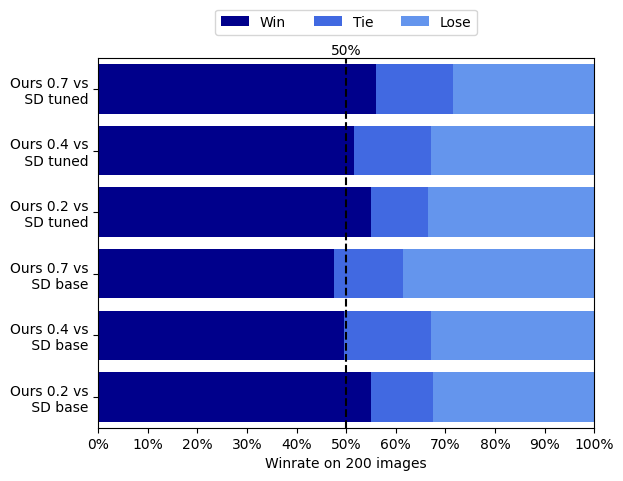

In [7]:
# horizontal bar plots
plt.barh(x, percent_wins200, label = "Win", color='darkblue')
plt.barh(x, percent_ties200, label = "Tie", color='royalblue', left=percent_wins200)
plt.barh(x, percent_loses200, label = "Lose", color='cornflowerblue', left=np.add(percent_wins200, percent_ties200))


# plt.title('Match Outcomes')
plt.xlabel('Winrate on 200 images')

plt.ylim(-0.5, num_elements - 0.5)
plt.yticks(x, versuses)

plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 11), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.axvline(x=50, color='black', linestyle='--')
plt.text(50, num_elements - 0.5, '50%', ha='center', va='bottom')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()


In [27]:
res2 = results_sort['totals'].values

wins2 = [res2[i] for i in range(12, 18, 1)]
ties2 = [res2[i] for i in range(6, 12, 1)]
loses2 = [res2[i] for i in range(6)]

# wins2 = wins2[::-1]
# ties2 = ties2[::-1]
# loses2 = loses2[::-1]

total_matches = 200
percent_wins200_2 = [w / total_matches * 100 for w in wins2]
percent_ties200_2 = [t / total_matches * 100 for t in ties2]
percent_loses200_2 = [l / total_matches * 100 for l in loses2]


versuses2 = ['Ours 0.2 vs\n SD base', 'Ours 0.2 vs\n SD tuned', 'Ours 0.4 vs\n SD base', 'Ours 0.4 vs\n SD tuned', 'Ours 0.7 vs\n SD base', 'Ours 0.7 vs\n SD tuned']

num_elements = len(wins2)
bar_width = 0.3
x = np.arange(num_elements)

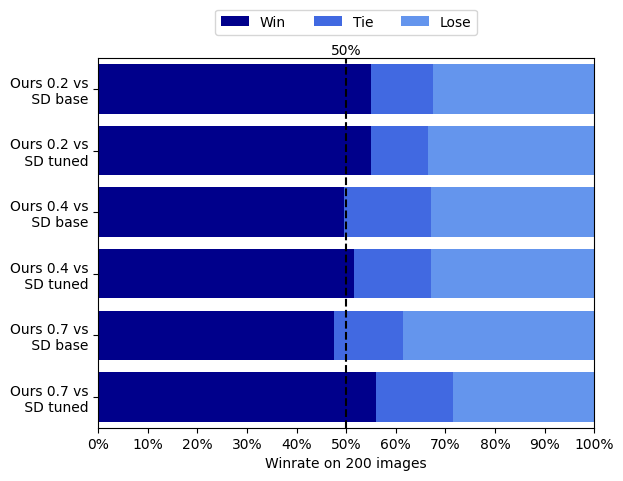

In [23]:
# horizontal bar plots
plt.barh(x, percent_wins200_2, label = "Win", color='darkblue')
plt.barh(x, percent_ties200_2, label = "Tie", color='royalblue', left=percent_wins200_2)
plt.barh(x, percent_loses200_2, label = "Lose", color='cornflowerblue', left=np.add(percent_wins200_2, percent_ties200_2))


# plt.title('Match Outcomes')
plt.xlabel('Winrate on 200 images')

plt.ylim(-0.5, num_elements - 0.5)
plt.yticks(x, versuses2[::-1])

plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 11), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.axvline(x=50, color='black', linestyle='--')
plt.text(50, num_elements - 0.5, '50%', ha='center', va='bottom')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()


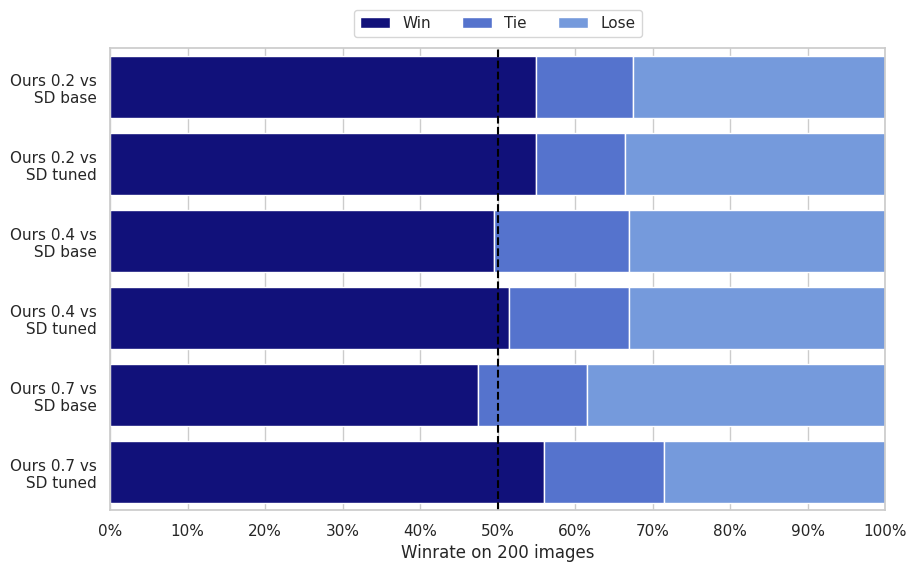

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=percent_wins200_2, y=versuses2, color='darkblue', label="Win")
sns.barplot(x=percent_ties200_2, y=versuses2, color='royalblue', label="Tie", left=percent_wins200_2)
sns.barplot(x=percent_loses200_2, y=versuses2, color='cornflowerblue', label="Lose", left=np.add(percent_wins200_2, percent_ties200_2))

plt.xlabel('Winrate on 200 images')
plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 11), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.axvline(x=50, color='black', linestyle='--')
# plt.text(50, num_elements - 0.5, '50%', ha='center', va='bottom')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

plt.show()
